# CS 132 21.2 Machine Project
# Florida Traffic and Air Quality Index Analysis Notebook

## About this Project
This project aims to determine the correlation between the Air Quality Index in the different counties in Florida, USA with respect to its traffic volume, temperature, and precipitation. Specifically, this project aims to know the following:
- How correlated are the traffic volume, temperature, and precipitation in terms of the PM 2.5 Air Quality Index in the different counties in Florida? Which counties tend to have a stronger correlation in terms of a global ranking compared to other counties?
- For the top county in terms of a global ranking according to its correlation coefficients, by how much does the AQI change with respect to a change in traffic volume, temperature, and precipitation?

## About this Notebook
This Python notebook is dedicated for the following steps in CS 132 21.2 project:
- Cleaning and processing the datasets further
- Exploratory data analysis
- Using linear regression to model the increase in AQI per amount of cars that are added
- Visualizing the data

This notebook/report is prepared by:
- James Matthew G. Borines
- Alyssa Beatrice A. Diokno
- Derryn Joi O. Martirez
- Jan Albert D. Quidet

## Preliminaries

The following external libraries used in this notebook is given by the list below. Make sure that the following are installed in your machine before running subsequent cells. These libraries were installed via `pip`: `pip install <library-name>`
- `pandas`
- `seaborn`
- `sklearn`
- `matplotlib`
- `numpy`

Run the cell below to load all dependencies and libraries

In [67]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Sources and Datasets

The following datasets and data sources were used for this project:
- The traffic dataset from Florida was obtained from this link: [https://www.fdot.gov/statistics/trafficdata/default.shtm](https://www.fdot.gov/statistics/trafficdata/default.shtm)
- The air quality dataset from Florida was obtained from this link: [https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI](https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI)
- The weather dataset from Florida was obtained from this link: [https://climatecenter.fsu.edu/climate-data-access-tools/downloadable-data](https://climatecenter.fsu.edu/climate-data-access-tools/downloadable-data)

The traffic dataset and the weather dataset are composed of multiple downloaded CSV files, which were preprocessed through another notebook. For a complete list of the project repository containing the Python notebooks, the preprocessed data files, and the raw files, you may visit the GitHub repository: [https://github.com/JMBorines14/air-quality-analysis](https://github.com/JMBorines14/air-quality-analysis)

However, the collected datasets were limited to a period of January 1, 2020 to July 7, 2020 since the data source for the traffic dataset only recorded the traffic volume on these dates. With this, the air quality and weather dataset have to be adjusted to include the date range.

## Loading Datasets

We define two dataframe variables, which will be used throughout the duration of this notebook/report:
- `traffic_data`: pertains to the traffic data in Florida
- `airq_data`: pertains to the air quality data in Florida
- `weather_data`: pertains to the weather data in Florida

Both of these datasets are preprocessed beforehand.
- `traffic_data` was preprocessed through the `Traffic Data Preprocessing Notebook.ipynb`
- `airq_data` was preprocessed through the `Air Quality Preprocessing Notebook.ipynb`
- `weather_data` was preprocessed through the `Weather Preprocessing Notebook.ipynb`

It must be noted that the `traffic_data` and `weather_data` were preprocessed from *multiple* dataset files.

In [68]:
traffic_data = pd.read_csv('florida_traffic_data.csv')
weather_data = pd.read_csv('florida_weather_data.csv')
airq_data = pd.read_csv('florida_aqi_data.csv')

In [69]:
traffic_data.head()

,01/01,01/02,01/03,01/04,01/05,01/06,01/07,01/08,01/09,01/10,...,06/29,06/30,07/01,07/02,07/03,07/04,07/05,07/06,07/07,COUNTY
0,93577,130263,137751,110805,101379,120925,117384,122200,125525,133191,...,98897,99327,102682,111925,103217,71816,81094,99167,96529,Charlotte
1,27107,42907,45616,33070,32908,41046,43203,44375,45091,47476,...,35886,38459,43349,46666,45621,34863,31295,40701,42047,Citrus
2,236551,325565,338452,284312,264567,314038,304515,310861,318654,335605,...,216490,214114,220510,234920,218501,147360,165241,213985,207772,Collier
3,15620,22611,24145,18099,18292,22028,21675,22571,23220,25535,...,18203,18602,18885,20446,18055,12816,14553,18841,17845,Desoto
4,3437,4675,5495,3620,3310,4655,4581,4488,4883,5273,...,3963,3847,4235,4159,3614,2638,2901,3808,3913,Glades


The preprocessed traffic data contains the following information:
- Each row represents a county in Florida that has traffic data
- Each column represents a date in which traffic data was recorded
- Each cell represents the total volume of traffic for a particular county on a particular date.

For example, `traffic_data[0]` contains the traffic data for "Charlotte" county from January 1 to July 7, 2020. 

In [70]:
weather_data.head()

,COUNTY,DATE,PRECIPITATION,MEAN TEMP
0,Alachua,01/01,0.00000,52.5
1,Alachua,01/02,0.00000,61.5
2,Alachua,01/03,0.00001,73.0
3,Alachua,01/04,0.68000,63.0
4,Alachua,01/05,0.00000,50.0


The preprocessed weather data contains the following information:

- The `COUNTY` column signifies the county in which weather data is recorded
- The `DATE` column signifies the date in which weather data is recorded
- The `PRECIPITATION` column signifies the average precipitation level for the county at that date (in inches)
- The `MEAN TEMP` column signifies the average temperature for the county at that date (in degrees Fahrenheit)

In [71]:
airq_data.head()

,COUNTY,DATE,AQI,PARAMETER
0,Alachua,01/03,35,PM2.5
1,Alachua,01/08,52,PM2.5
2,Alachua,01/09,48,PM2.5
3,Alachua,01/11,38,PM2.5
4,Alachua,01/12,37,PM2.5


The preprocessed air quality data contains the following information:
- The `COUNTY` column signifies the county in which air quality data is recorded
- The `DATE` column signifies the date in which air quality data is recorded
- The `AQI` column signifies the Air Quality Index recorded for that particular county at a particular date
- The `PARAMETER` column defines the *recorded parameter* to which AQI is recorded. The original dataset contains other defining parameters, such as *Ozone*, *CO*, and *SO2*.

Each cell represents the PM2.5 air quality index measurement for a particular county and particular date.

# PART 1: Preprocessing Data

There are only certain counties that have been recorded by the air quality data of Florida. We can then filter the traffic data so that its counties is consistent with the recorded counties in the air quality data.

In [72]:
#determine counties in the air quality data
county_airq = airq_data['COUNTY'].unique()

county_airq

array(['Alachua', 'Baker', 'Bay', 'Brevard', 'Broward', 'Citrus',
       'Collier', 'Columbia', 'Duval', 'Escambia', 'Hamilton',
       'Hillsborough', 'Holmes', 'Lee', 'Leon', 'Marion', 'Martin',
       'Miami-Dade', 'Nassau', 'Orange', 'Palm Beach', 'Pinellas', 'Polk',
       'Santa Rosa', 'Sarasota', 'Seminole', 'Volusia', 'Wakulla'],
      dtype=object)

In [73]:
#determine counties in traffic data
county_traffic = traffic_data['COUNTY'].unique()

county_traffic

array(['Charlotte', 'Citrus', 'Collier', 'Desoto', 'Glades', 'Hendry',
       'Hernando', 'Highlands', 'Hillsborough', 'Lake', 'Lee', 'Manatee',
       'Pasco', 'Pinellas', 'Polk', 'Sarasota', 'Sumter', 'Alachua',
       'Baker', 'Bradford', 'Columbia', 'Dixie', 'Hamilton', 'Lafayette',
       'Levy', 'Madison', 'Marion', 'Suwannee', 'Taylor', 'Bay',
       'Calhoun', 'Escambia', 'Franklin', 'Gadsden', 'Gulf', 'Holmes',
       'Jackson', 'Jefferson', 'Leon', 'Liberty', 'Okaloosa',
       'Santa Rosa', 'Wakulla', 'Walton', 'Washington', 'Brevard', 'Clay',
       'Duval', 'Flagler', 'Nassau', 'Orange', 'Putnam', 'Seminole',
       'St. Johns', 'Volusia', 'Broward', 'Miami-Dade', 'Indian River',
       'Martin', 'Monroe', 'Osceola', 'Palm Beach', 'St. Lucie',
       "Florida's Turnpike"], dtype=object)

In [74]:
county_weather = weather_data['COUNTY'].unique()

county_weather

array(['Alachua', 'Baker', 'Bay', 'Brevard', 'Broward', 'Citrus',
       'Collier', 'Columbia', 'Duval', 'Escambia', 'Hamilton',
       'Hillsborough', 'Lee', 'Leon', 'Marion', 'Martin', 'Miami-Dade',
       'Nassau', 'Orange', 'Palm Beach', 'Pinellas', 'Polk', 'Sarasota',
       'Seminole', 'Volusia'], dtype=object)

In [75]:
#determine counties that are common for both datasets
common_counties = list(set(county_airq).intersection(set(county_traffic)))
common_counties = list(set(common_counties).intersection(set(county_weather)))

print(common_counties)

['Orange', 'Sarasota', 'Palm Beach', 'Brevard', 'Martin', 'Bay', 'Lee', 'Alachua', 'Pinellas', 'Hillsborough', 'Collier', 'Escambia', 'Miami-Dade', 'Duval', 'Columbia', 'Broward', 'Leon', 'Hamilton', 'Baker', 'Citrus', 'Polk', 'Nassau', 'Marion', 'Seminole', 'Volusia']


The variable `common_counties` represent counties in Florida that are common for both air quality and traffic data. We could now filter both the traffic and air quality data according to their common counties, represented by the `common_counties` variable.

In [76]:
#filter the traffic data by common counties
traffic_data = traffic_data[traffic_data['COUNTY'].isin(common_counties)]

traffic_data.sort_values('COUNTY', inplace = True)
traffic_data.head()

,01/01,01/02,01/03,01/04,01/05,01/06,01/07,01/08,01/09,01/10,...,06/29,06/30,07/01,07/02,07/03,07/04,07/05,07/06,07/07,COUNTY
17,114200,154629,166054,151168,146477,138321,128157,127949,134169,147862,...,125297,122412,131997,143193,137491,90080,118842,131855,120127,Alachua
18,2071,2796,3081,2526,2375,2565,2627,2745,2853,3272,...,2965,2929,3014,3288,3183,2641,2550,2857,2707,Baker
29,92354,139450,141158,111372,91151,139712,144079,144889,145925,154921,...,138276,154222,139730,166732,155771,124145,123179,133025,145192,Bay
45,261851,367668,401305,332429,299054,346140,321507,325505,332772,370856,...,287127,291592,295687,320577,305800,215883,242171,281311,275538,Brevard
55,654055,855843,900897,785596,702080,873355,902844,893983,908921,925687,...,715555,734498,736393,764052,712455,522985,494879,697840,709431,Broward


In [77]:
#filter the air quality data by common counties
airq_data = airq_data[airq_data['COUNTY'].isin(common_counties)]

airq_data.head()

,COUNTY,DATE,AQI,PARAMETER
0,Alachua,01/03,35,PM2.5
1,Alachua,01/08,52,PM2.5
2,Alachua,01/09,48,PM2.5
3,Alachua,01/11,38,PM2.5
4,Alachua,01/12,37,PM2.5


In [78]:
#filter the weather data by common counties
weather_data = weather_data[weather_data['COUNTY'].isin(common_counties)]

weather_data.head()

,COUNTY,DATE,PRECIPITATION,MEAN TEMP
0,Alachua,01/01,0.00000,52.5
1,Alachua,01/02,0.00000,61.5
2,Alachua,01/03,0.00001,73.0
3,Alachua,01/04,0.68000,63.0
4,Alachua,01/05,0.00000,50.0


In [79]:
print("The shape of traffic data after filtering is {}".format(traffic_data.shape))
print("The shape of weather data after filtering is {}".format(weather_data.shape))
print("The shape of air quality data after filtering is {}".format(airq_data.shape))

The shape of traffic data after filtering is (25, 185)
The shape of weather data after filtering is (9150, 4)
The shape of air quality data after filtering is (1949, 4)


# PART 2: Exploratory Data Analysis

Both air quality and traffic data from selected counties in Florida state have been preprocessed/cleaned. We can then visualize the trends both in traffic and air quality data in selected counties in Florida.

## PART 2.1: Filtering DataFrame by County

We can then filter our dataframes according to a specific county. Let us define a function `filter_data` that performs the following tasks:
- Filter the air quality dataset to a specified county
- Filter the traffic dataset to a specified county
- Filter recorded dates, since there are particular dates that are not present in the traffic data, weather data, or air quality data
- Combine datasets into a single dataframe

The function takes in the traffic dataset (given by `traffic`), the air quality dataset (given by `air_quality`), and the specific county (given by `county`). This function will output a **new `pandas` DataFrame** such that each row represents the traffic volume and air quality index for a particular county at a particular date. An example, template dataframe is given below:

|Date|AQI|traffic_volume|precipitation|temperature|
|----|---|--------------|-------------|-----------|
|01/01|XXX|XXXXX|XXXXX|XXXXX|
|01/02|YYY|YYYYY|YYYYY|YYYYY|
|01/03|ZZZ|ZZZZZ|ZZZZZ|ZZZZZ|
|...|...|...|...|...|

In [80]:
def filter_data(traffic, air_quality, weather, county):
    #create temporary datasets such that air quality and traffic data are filtered by specific county
    temp1 = air_quality[air_quality['COUNTY'] == county]
    temp2 = traffic[traffic['COUNTY'] == county]
    temp3 = weather[weather['COUNTY'] == county]
    
    #filter recorded dates for both air quality and traffic data
    date1 = list(temp2.columns[1:])
    date2 = list(temp1['DATE'])
    date3 = list(temp1['DATE'])
    
    #determine the common dates for both datasets using set intersection
    common_dates = list(set(date1).intersection(set(date2)))
    common_dates = list(set(common_dates).intersection(set(date3)))
    common_dates.sort() #sort the common dates
    
    #further filter the temporary datasets such that the dates are in common dates
    temp1 = temp1[temp1['DATE'].isin(common_dates)]
    temp2 = temp2[common_dates]
    temp3 = temp3[temp3['DATE'].isin(common_dates)]
    
    #define new dataframe to_return that is copied from AQI data
    to_return = temp1[['DATE', 'AQI', 'COUNTY']].copy(deep = True)
    to_return = to_return.merge(temp3[['DATE','PRECIPITATION','MEAN TEMP']], how='inner', on='DATE')
    
    #record the traffic volume values per common date, append it to tem_lis
    tem_lis = []
    for i in common_dates:
        tem_lis.append(temp2[i].values[0])
    
    to_return['TRAFFIC'] = tem_lis #add tem_lis as a new column in to_return
    to_return = to_return.reset_index(drop = True) #reset index
    
    return to_return

We can test our newly-created function to a specific county. **For the cells below, you can change the value of `county` variable and run the cell to see the results for a specific county.** You may check for the list of common counties in both datasets by looking at the `common_counties` variable.

In [81]:
print(common_counties)

['Orange', 'Sarasota', 'Palm Beach', 'Brevard', 'Martin', 'Bay', 'Lee', 'Alachua', 'Pinellas', 'Hillsborough', 'Collier', 'Escambia', 'Miami-Dade', 'Duval', 'Columbia', 'Broward', 'Leon', 'Hamilton', 'Baker', 'Citrus', 'Polk', 'Nassau', 'Marion', 'Seminole', 'Volusia']


In [82]:
#You may change the county variable according to a value in the common_counties variable
county = "Collier"

test_var = filter_data(traffic_data, airq_data, weather_data, county)
test_var

,DATE,AQI,COUNTY,PRECIPITATION,MEAN TEMP,TRAFFIC
0,01/03,29,Collier,0.0,67.5,338452
1,01/10,37,Collier,0.0,66.0,335605
2,01/11,45,Collier,0.0,71.5,278819
3,01/12,37,Collier,0.0,77.0,253325
4,01/13,34,Collier,0.0,76.0,310912
...,...,...,...,...,...,...
74,06/29,58,Collier,0.1,77.5,216490
75,06/30,62,Collier,0.0,78.5,214114
76,07/01,64,Collier,0.0,83.0,220510
77,07/02,62,Collier,0.0,86.5,234920


## PART 2.2: Exploring the Correlation Between Traffic and AQI

The `.corr()` method of `pandas` returns a dataframe that measures the correlation between two or more different variables. We want to know specifically how well-correlated the traffic data and AQI are for all common counties. Let us define a function `corr_measure` that returns the correlation value between the traffic data and AQI using Pearson's correlation coefficient.

The values of the correlation coefficient determine the strength of association between the two variables. The table below shows the scale of correlation based on their Pearson's correlation coefficient.

|Scale of correlation coefficient| Value |
|--------------------------------|-------|
| $0<r \leq 0.19$                |Very Low|
|$0.2 \leq r \leq 0.39$          |Low|
|$0.4 \leq r \leq 0.59$          |Moderate|
|$0.6 \leq r \leq 0.79$          |High|
|$0.8 \leq r \leq 1.0$           |Very High|

The function `corr_measure` takes in the following variables:
- `x_axis`, corresponding to the name of the x-axis (string) => traffic volume, precipitation, and mean temperature
- `y_axis`, corresponding to the name of the y-axis (string) => AQI
- `src`, the pandas dataframe source

This function will return a tuple corresponding to the correlation coefficients of the features with respect to the target variable. Specifically, the function will then return a 3-tuple corresponding to: (correlation of traffic and AQI, correlation of precipitation and AQI, correlation of temperature and AQI)

In [83]:
features = ['TRAFFIC', 'PRECIPITATION', 'MEAN TEMP']
target = 'AQI'

xy = features.copy()
xy.append(target)

def corr_measure(xy, src):
    temp = src[xy].corr() #construct correlation dataframe
    traffic_corr = temp.iloc[0][3]
    precipitation_corr = temp.iloc[1][3]
    temperature_corr = temp.iloc[2][3]

    #return a tuple of correlation coefficient & description of correlation
    return traffic_corr, precipitation_corr, temperature_corr

We then iterate the function over all common counties to determine the strength of the correlation of traffic data and AQI, and sort the results according to the absolute value of their correlation value. Since there are three correlation coefficients to be returned, we need to *locally sort* the correlation coefficients for each feature (i.e. sort the correlation coefficient and get ranking of the counties in terms of traffic, then in precipitation, etc.). 

After determining the local rankings of the correlation coefficients for each feature, we can determine the global ranking of each county for all three features by using the formula:

$\text{global ranking} = \frac{\text{traffic correlation ranking} + \text{precipitation correlation ranking} + \text{temperature correlation ranking}}{3}$

In [84]:
results = []

# Store the rankings of each county's correlation coefficients
ranking = {
    'COUNTY': common_counties,
    'TRAFFIC': [],
    'PRECIPITATION': [],
    'TEMPERATURE': []
    }

for i in common_counties:
    test_df = filter_data(traffic_data, airq_data, weather_data, i)
    traffic, precipitation, temperature = corr_measure(xy, test_df)
    results.append((i, traffic, precipitation, temperature))

In [85]:
results.sort(key = lambda x: (abs(x[1])), reverse = True) #sort the results according to traffic

for i in ranking['COUNTY']:
    for j in range(len(results)):
        if results[j][0] == i:
            rank = j + 1
            ranking['TRAFFIC'].append(rank)

results.sort(key = lambda x: (abs(x[2])), reverse = True) #sort the results according to precipitation

for i in ranking['COUNTY']:
    for j in range(len(results)):
        if results[j][0] == i:
            rank = j + 1
            ranking['PRECIPITATION'].append(rank)

results.sort(key = lambda x: (abs(x[3])), reverse = True) #sort the results according to temperature

for i in ranking['COUNTY']:
    for j in range(len(results)):
        if results[j][0] == i:
            rank = j + 1
            ranking['TEMPERATURE'].append(rank)

ranking_df = pd.DataFrame(data=ranking)# top5 = []
ranking_df['AVG RANK'] = sum([ranking_df.TRAFFIC, ranking_df.PRECIPITATION, ranking_df.TEMPERATURE])/3
ranking_df = ranking_df.sort_values('AVG RANK')
ranking_df = ranking_df.reset_index(drop=True)
ranking_df.head()

,COUNTY,TRAFFIC,PRECIPITATION,TEMPERATURE,AVG RANK
0,Leon,1,3,9,4.333333
1,Collier,5,2,6,4.333333
2,Brevard,4,9,1,4.666667
3,Lee,3,16,3,7.333333
4,Polk,6,1,21,9.333333


The dataframe above shows the **Top 5 counties** in terms of the computed average rank based on their local rankings for the correlation coefficients per feature. From the DataFrame, the top 5 counties that can be visualized and modelled are:
- Leon
- Collier
- Brevard
- Lee
- Polk

The function `describe_correlation_measurement` describes the strength and the direction of the relationship between the feature variable and the target variable according to the table specified at the start of this section. 

In [86]:
def describe_correlation_measurement(correlation_value):
    str = ""
    
    # determine the strength of correlation based on the correlation coefficient
    if 0.8 <= abs(correlation_value) <= 1.0:
        str = "very high"
    elif 0.6 <= abs(correlation_value) <= 0.79:
        str = "high"
    elif 0.4 <= abs(correlation_value) <= 0.59:
        str = "moderate"
    elif 0.2 <= abs(correlation_value) <= 0.39:
        str = "low"
    elif 0 <= abs(correlation_value) <= 0.19:
        str = "very low"
    
    # determine direction of correlation based on the correlation coefficient
    if correlation_value > 0:
        str += " positive relationship"
    elif correlation_value < 0:
        str += " negative relationship"
    
    return str

In [87]:
for i in range(5):
    temp_corr = corr_measure(xy, filter_data(traffic_data, airq_data, weather_data, ranking_df['COUNTY'][i]))
    print(ranking_df['COUNTY'][i])
    print("The correlation between traffic and AQI is {} which denotes ".format(temp_corr[0]) + describe_correlation_measurement(temp_corr[0]))
    print("The correlation between precipitation and AQI is {} which denotes ".format(temp_corr[1]) + describe_correlation_measurement(temp_corr[1]))
    print("The correlation between temperature and AQI is {} which denotes ".format(temp_corr[2]) + describe_correlation_measurement(temp_corr[2]))
    print()

Leon
The correlation between traffic and AQI is -0.43795223059571814 which denotes moderate negative relationship
The correlation between precipitation and AQI is -0.27371818610860693 which denotes low negative relationship
The correlation between temperature and AQI is 0.15091121744122352 which denotes very low positive relationship

Collier
The correlation between traffic and AQI is -0.29788094632917805 which denotes low negative relationship
The correlation between precipitation and AQI is -0.3301108060789565 which denotes low negative relationship
The correlation between temperature and AQI is 0.19166153002777594 which denotes  positive relationship

Brevard
The correlation between traffic and AQI is -0.3759101195122419 which denotes low negative relationship
The correlation between precipitation and AQI is -0.18790646054411184 which denotes very low negative relationship
The correlation between temperature and AQI is -0.42841104076485365 which denotes moderate negative relationshi

For all features, its correlation with AQI posit either moderate, low, or very low relationships.
- The Top 1 county in terms of a global average ranking has a moderate negative relationship between traffic and AQI, a low negative relationship between precipitation and AQI, and a very low positive relationship between temperature and AQI.
- Surprisingly, the relationship between traffic and AQI for the Top 5 counties are **all negative**, which implies that AQI decreases whenever the car volume increases. This deviates from the assumption that AQI and traffic volume will have a positive correlation (i.e. AQI increases per increase in traffic volume).
- Precipitation and AQI tend to have very low or low negative relationship
- Temperature and AQI also tend to have low or moderate negative relationship

## PART 2.3: Scatterplots of Top 5 Counties in Terms of Correlation Coefficient

Let us define a function `pairplot` that generates a scatterplot for the traffic and AQI data of a county. The scatterplot was generated using `seaborn`.

In [88]:
def pairplot(x, y, src, cnty):
    plot = sns.pairplot(src, x_vars=x, y_vars=y)
    plot.fig.suptitle(cnty, y=1.08)

The function was then applied to the Top 5 counties identified in the previous part: Leon, Collier, Brevard, Lee, and Polk. The pairplot will then show the scatterplot between traffic and AQI, precipitation and AQI, and mean temperature and AQI.

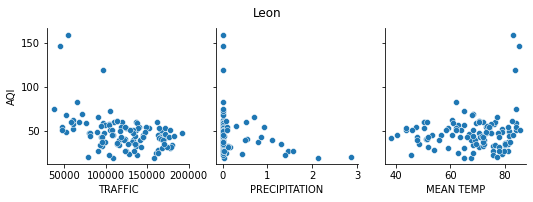

In [89]:
#scatterplot for Brevard
county = "Leon"

sp_df = filter_data(traffic_data, airq_data, weather_data, county)
pairplot(features, target, sp_df, county)

Based on the pair scatterplots in Brevard,
- The traffic and AQI data points tend to become spread out, and appears to not form any cohesive linear relationship.
- The precipitation and AQI data points tend to be 'concentrated' on the zero values.
- The mean temperature and AQI data points tend to be 'concentrated' at the far right side of the graph.

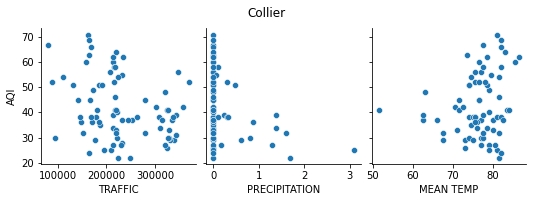

In [90]:
county = "Collier"

sp_df = filter_data(traffic_data, airq_data, weather_data, county)
pairplot(features, target, sp_df, county)

Based on the pair scatterplots in Leon,
- The traffic and AQI data tend to form a more cohesive linear relationship with one another, but the presence of outliers (located at the top of the graph) may have affected the strength of their relationship
- The precipitation and AQI data points also have a concentration at precipitation = 0, which explains the low relationship between the two
- Surprisingly, the mean temperature and AQI tend to have a positive relationship with one another despite having a very low correlation coefficient which can be explained by the 'increasing trend' in the pairplot. The data points seem to be closer but are still spread out. The presence of outliers may have affected the correlation coefficient, and thus, the relationship between the two.

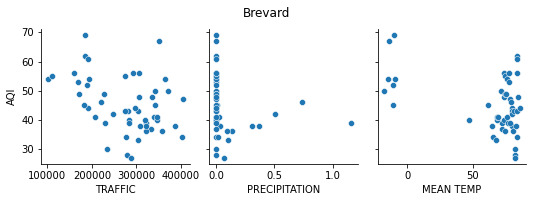

In [91]:
county = "Brevard"

sp_df = filter_data(traffic_data, airq_data, weather_data, county)
pairplot(features, target, sp_df, county)

Based on the pair scatterplots in Collier, both precipitation and mean temperature tend to have a positive relationship with AQI, which is shown by a positive-sloped line in both pairplots. However, they have a very low relationship with AQI because most of the precipitation and AQI data points tend to become concentrated at `precipitation = 0` while most of the mean temperature and AQI data points tend to become concentrated at a certain range of temperatures.

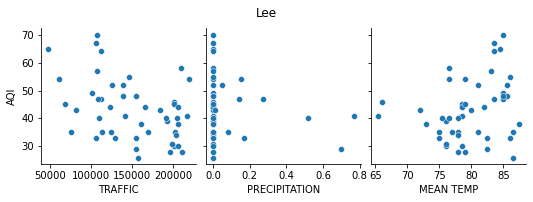

In [92]:
county = "Lee"

sp_df = filter_data(traffic_data, airq_data, weather_data, county)

pairplot(features, target, sp_df, county)

Based on the pair scatterplots in Lee,
- The precipitation and AQI data points tend to become concentrated at precipitation = 0, but there are other data points that are spread out.
- The mean temperature and AQI tend to form a positive relationship with one another, as indicated by a positive slope line in its respective pairplot. 

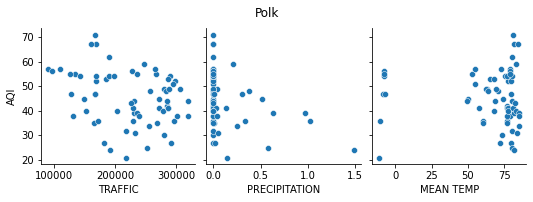

In [93]:
county = "Polk"

sp_df = filter_data(traffic_data, airq_data, weather_data, county)
pairplot(features, target, sp_df, county)

Based on the pair scatterplots in Seminole,
- Most of the precipitation and AQI data points tend to become concentrated at precipitation = 0, which explains the low negative relationship between the two variables.
- Most of the mean temperature and AQI data points tend to become concentrated on certain temperature ranges and at temperature = -100

## PART 2.4: Visualizing Trends

Let us define a function `trendplot` that visualizes linear trends of AQI from 1st of January to 7th of July; and Precipitation, Temperature, and Traffic for each day in Year 2020. The visualized linear trend was generated using `matplotlib`.

In [138]:
#code for trend visuals here
def trendplot(county):
    fig, cntys = plt.subplots(4, 1, constrained_layout=True)
    fig.suptitle(county)
    fig.align_labels()


    cnty = cntys[0]
    aqi_df = airq_data[airq_data['COUNTY'] == county]
    cnty.plot(aqi_df['DATE'], aqi_df['AQI'])
    cnty.set_ylabel('AQI')
    cnty.set_xticks([])

    cnty = cntys[1]
    precip_df = weather_data[weather_data['COUNTY'] == county]
    cnty.plot(precip_df['DATE'], precip_df['PRECIPITATION'])
    cnty.set_ylabel('PRECIPITATION')
    cnty.set_xticks([])

    cnty = cntys[2]
    tempe_df = weather_data[weather_data['COUNTY'] == county]
    cnty.plot(tempe_df['DATE'], tempe_df['MEAN TEMP'])
    cnty.set_ylabel('TEMPERATURE')
    cnty.set_xticks([])

    cnty = cntys[3]
    dates = list(traffic_data.columns)[:-1]
    traffic = traffic_data.loc[traffic_data['COUNTY'] == county].values.flatten().tolist()[:-1]
    cnty.plot(dates, traffic)
    cnty.set_ylabel('TRAFFIC')
    cnty.set_xticks([])

    plt.show()



The function was then applied to the Top 5 counties identified in the previous part: Leon, Collier, Brevard, Lee, and Polk. The `trendplot` will then show the linear trends accordingly.


For the sake of consistency, the x-axis label has been removed.
Note that the x-axis contains the dates for each recorded data each day.
AQI contains data from 1st of January to 7th of July.
Precipitation, Temperature, and Traffic for each day in Year 2020.

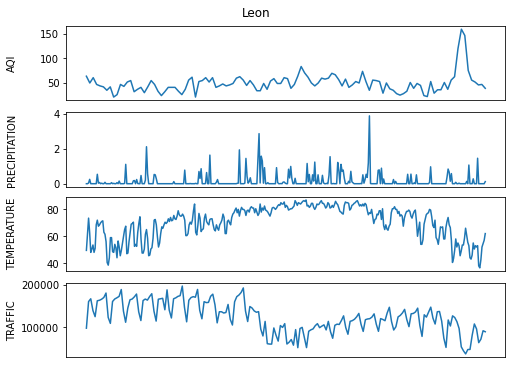

In [139]:
county = 'Leon'
trendplot(county)

Based on the visualized trends in Leon,
- The AQI data has corrugated over the days and peaked around June and July
- Precipitation had a baseline of 0 but fluctuates arbitrarily over time and peaked around the middle of 2020
- Temperature has risen consistently in the middle of 2020
- Traffic data fluctuates in a recognizable pattern throughout 2020 that lowers in the middle

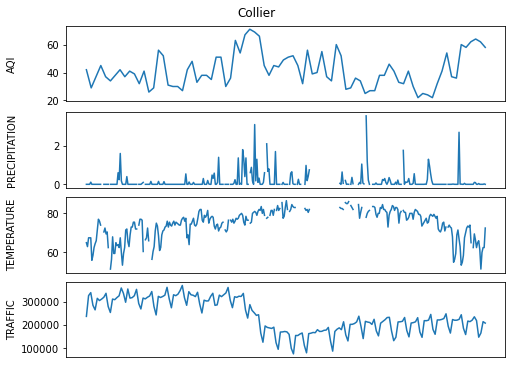

In [140]:
county = 'Collier'
trendplot(county)

Based on the visualized trends in Collier,
- The AQI data has corrugated over the days and peaked around March and April
- Precipitation had a baseline of 0 but fluctuates arbitrarily over time and peaked around the 2nd half of 2020
- Temperature has risen consistently in the middle of 2020
- Traffic data fluctuates in a recognizable pattern throughout 2020 that lowers in the middle

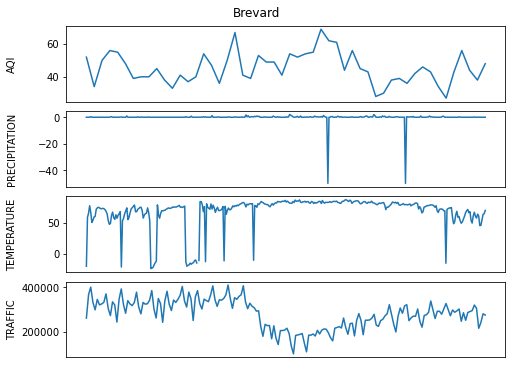

In [141]:
county = 'Brevard'
trendplot(county)

Based on the visualized trends in Brevard,
- The AQI data has solid bold lines and peaked around March and April
- Precipitation had a baseline of 0 but does not apparently change over time and greatly plummeted around the 2nd half of 2020
- Temperature kept on plummeting throughout 2020 but maintains a high temperature around the 2nd half of 2020
- Traffic data fluctuates in a recognizable pattern throughout 2020 that lowers around the middle

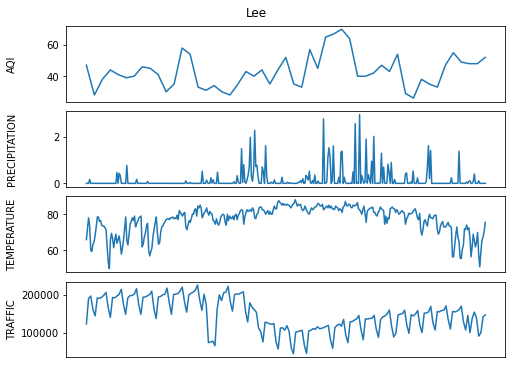

In [143]:
county = 'Lee'
trendplot(county)

Based on the visualized trends in Lee,
- The AQI data has solid bold lines and peaked around April
- Precipitation had a baseline of 0 but does not apparently change until around March and had intense peaks around the 2nd half of 2020
- Temperature kept on plummeting throughout 2020 but maintains a high temperature throughout most of 2020
- Traffic data fluctuates in a recognizable pattern throughout 2020 that lowers around the middle

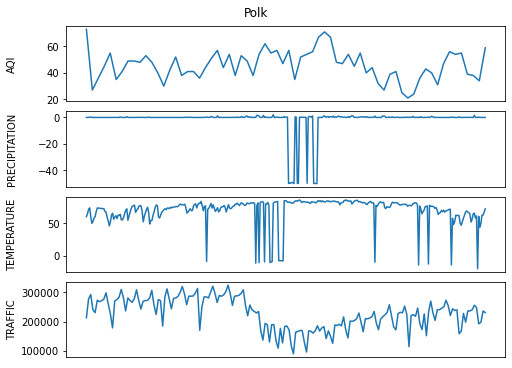

In [144]:
county = 'Polk'
trendplot(county)

Based on the visualized trends in Polk,
- The AQI data has solid bold lines and peaked around March and April
- Precipitation had a baseline of 0 but does not apparently change over time and greatly plummeted around the middle of 2020
- Temperature kept on plummeting throughout 2020 especiall around the middle pf 2020
- Traffic data fluctuates in a recognizable pattern throughout 2020 that lowers around the middle

# PART 3: Using the Multiple Regression Model

For this portion, we can then create a multiple regression model that predicts the trend in the Air Quality Index of a particular county in Florida based on its traffic volume, temperature, and precipitation. However, there have been some adjustments to the dataset based on the results of the pair scatterplots of the top 5 counties in terms of a global ranking. 

Despite being ranked second globally, the cohesiveness and the large number of data points were seen in the pairplots in *Leon* county. A multivariate regression model will then be created for this particular county.

## PART 3.1: Removing Outliers

The presence of outliers in the pairplots in *Leon* county may have affected the correlation coefficients of `Traffic`, `Temperature`, and `AQI` data, and may also affect the validity and the strength of the regression model. For this part, the outliers will then be removed through the Inter-Quartile Range (IQR).

In [145]:
features = ['TRAFFIC', 'PRECIPITATION', 'MEAN TEMP']
target = 'AQI'

county = "Leon"
dataset = filter_data(traffic_data, airq_data, weather_data, county)

Q1 = np.percentile(dataset['AQI'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dataset['AQI'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("The old shape before removal is {}".format(dataset.shape))

upper = np.where(dataset['AQI'] >= (Q3+1.5*IQR))
lower = np.where(dataset['AQI'] <= (Q1-1.5*IQR))

dataset.drop(upper[0], inplace = True)
dataset.drop(lower[0], inplace = True)

dataset.dropna()

print("The new shape after removal is {}".format(dataset.shape))

The old shape before removal is (112, 6)
The new shape after removal is (108, 6)


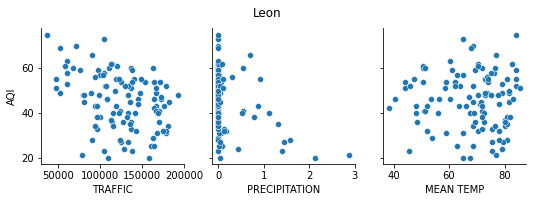

In [146]:
pairplot(features, target, dataset, county)

Upon showing the scatter plots for the county, the outliers for the traffic and AQI scatter plot identified in the previous section have now been removed. We can then proceed with training the model. However, the concentration of precipitation and AQI data points at precipitation = 0 may affect the linear regression model. The dataframe will then have to be adjusted by removing the `PRECIPITATION` feature and readjusting the features to traffic and mean temperature only.

In [147]:
dataset.drop("PRECIPITATION", axis = 1, inplace = True)
features = ['TRAFFIC', 'MEAN TEMP']
target = 'AQI'

dataset

,DATE,AQI,COUNTY,MEAN TEMP,TRAFFIC
0,01/03,49,Leon,73.5,166942
1,01/06,60,Leon,50.5,162310
2,01/07,46,Leon,53.5,163466
3,01/08,43,Leon,48.0,166014
4,01/09,41,Leon,51.0,170007
...,...,...,...,...,...
107,06/29,55,Leon,84.0,47745
108,06/30,51,Leon,85.5,47945
109,07/01,45,Leon,81.5,81166
110,07/02,46,Leon,83.0,107798


## PART 3.2: Train-Test Split and Training the Model

Before creating a *multivariate linear regression model*, we have to split our data into random training and test sets using the `train_test_split` function from `sklearn.model_selection`

In [148]:
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size=1/5)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(86, 2) (86,)
(22, 2) (22,)


Using `LinearRegression()`, we can then train our model through our training sets.

In [149]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"intercept: {model.intercept_}")
for i in zip(features, model.coef_):
    print(i)

intercept: 84.6125865490196
('TRAFFIC', -0.00015557701598637965)
('MEAN TEMP', -0.2954254266008489)


The results of training the model can then be interpreted as follows: <br/> 
$$ y = \text{intercept} + \text{TRAFFIC\_coeff}x_0 + \text{MEAN TEMP\_coeff}x_1 $$

where...
-`intercept` represents the expected AQI value whenever the traffic volume and temperature is 0
-`TRAFFIC` represents the coefficient for the traffic component in the linear regression model. This represents the amount of change in the expected AQI whenever the traffic volume is increased by a unit.
-`MEAN TEMP` represents the coefficient for the *mean temperature* component in the linear regression model. This represents the amount of change in the expected AQI whenever the mean temperature is increased by a unit.

## PART 3.3: Performance Measurement

For this portion, we will feed our test set to our model and determine its accuract. The `score` function of `LinearRegression()` and RMSE will then be used to determine the performance of the model.

In [150]:
print("The score of our model with respect to the test set is {}%".format(model.score(X_test, y_test) * 100))

The score of our model with respect to the test set is 18.857283823027203%


# PART 4: Summary of Points

To summarize, this project aimed to determine the correlation between the Air Quality Index (AQI) in the different counties in Florida, USA with respect to its traffic volume, temperature, and precipitation. Three different data sets were used:

- traffic data set
- air quality index data set
- weather data set

The exploratory data analysis revealed important information. First, the top five counties in Florida with respect to their correlation rankings were identified. They were Leon, Collier, Brevard, Lee, and Polk. In addition, the correlation between the AQI and the traffic volume, temperature, and precipitation were calculated and were used to further understand their relationships among each other.

The previously identified top five counties were also visualized through scatterplots. These revealed pertinent information as detailed in the report earlier. Generally, the following points were identified:

- The precipitation and the AQI tended to concentrate at precipitation = 0, though spread out data points were also present for all.
- The observations were less uniform for traffic and temperature among the five counties.

Trends were then visualized using matplotlib. To a large extent, the trends for AQI, precipitation, temperature, and traffic appeared to be different among the five counties.

For the last part, a multivariate regression model that predicts the trend in the AQI of Leon county based on its traffic volume, temperature, and precipitation was created. Leon county was chosen due to the cohesiveness and the large number of data points seen in its pairplots.

Before creating the model itself, outliers present in the data set were removed. The following screenshots show the scatter plots before and after the outliers were removed.

<img src="before.png">
<img src="after.png">

The data was then split into random training and test sets. After the train-test split, the model was trained with the following interpretation as the result:

$$ y = \text{intercept} + \text{TRAFFIC\_coeff}x_0 + \text{MEAN TEMP\_coeff}x_1 $$

Lastly, the performance of the model was measured to have a score of 27.5250578920186% with respect to the test set.
